In [1]:
import numpy as np
import scipy.integrate as sp
import matplotlib.pyplot as plt

# Define constants
rho = 1
c = 3.00*(10**8)
h_bar = (6.63*10**-34)/(2*np.pi)
epsilon = rho*(c**2)
m_N = (((1.6749*10**-27 * 6) + (1.6726*10**-27 * 6))/12)
m_e = (9.11*10**-31)
G = 6.67*10**-11

# Define variables

k_F = np.linspace(0.15, 1, 40)*m_e*c
k_F2 = np.linspace(1.01, 2.6, 40)*m_e*c
K_rel = ((h_bar*c)/(12*(np.pi**2)))*(((3/2)*(np.pi**2))/(m_N*(c**2)))**(4/3)
K_nrel = ((h_bar**2)/(15*((np.pi**2)*m_e)))*(((3/2)*(np.pi**2))/(m_N*(c**2)))**(5/3)

# Define function to change units

Densities = ((2*m_N)/(3*np.pi**2))*(k_F/h_bar)**3
print(Densities[21])
Densities2 = ((2*m_N)/(3*np.pi**2))*(k_F2/h_bar)**3
print(Densities2[21])
print(Densities[len(Densities)-1])

# 'Function' fro relativistic

P_central = []
for i in k_F:
    if i > m_e*c:
        K = K_rel
        P_c = i**4*c/(12*np.pi**2*h_bar**3)
    else:
        K = K_nrel
        P_c = i**5/(15*np.pi**2*m_e*h_bar**3)
    P_central = P_central + [P_c]

# Define derivaties

P_med = (P_central[21])

def dM_dr(P, m, r):
    if K == K_rel:
        dMdr = 4*np.pi*r**2*P**(3/4)/(c**2*K**(3/4))
    else:
        dMdr = 4*np.pi*r**2*P**(3/5)/(c**2*K**(3/5))
    return dMdr

def dP_dr(P, m, r):
    if K == K_rel:
        dPdr = -G*m*P**(3/4)/(c**2*r**2*K**(3/4))
    else:
        dPdr = -G*m*P**(3/5)/(c**2*r**2*K**(3/5))
    return dPdr

440827538.8997814
12766146771.775925
1964343800.3136058


1.435386304694585


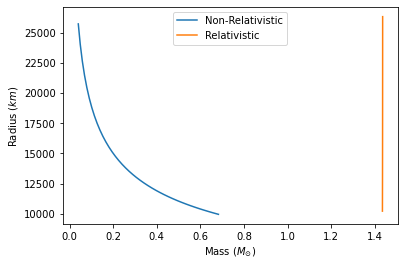

In [65]:
# Define numerical integration function

def integrate(P, m):
    end = False
    r = 1
    step = 1000
    Masses = []
    Pressures = []
    while end == False:
        slope_m = dM_dr(P, m, r)
        m = m + slope_m * step
        slope_P = dP_dr(P, m, r)
        P = P + slope_P * step
        if P < 0:
            break
        Masses = Masses + [m]
        Pressures = Pressures + [P]
        r = r + step
    return m, r

# Function to loop over all central pressures

def results(P, m):
    M_maxs = []
    Radii = []
    for i in range(0, len(P)):
        M_max, Radius = integrate(P[i], m)
        M_maxs = M_maxs + [M_max/(1.989*10**30)]
        Radii = Radii + [Radius/1000]
    return M_maxs, Radii

# Plot

x, y = results(P_central, 0)

plt.plot(x, y, label = 'Non-Relativistic')

# New 'function' for relativistic

P_central2 = []
for i in k_F2:
    if i > m_e*c:
        K = K_rel
        P_c = i**4*c/(12*np.pi**2*h_bar**3)
    else:
        K = K_nrel
        P_c = i**5/(15*np.pi**2*m_e*h_bar**3)
    P_central2 = P_central2 + [P_c]

P_med2 = P_central2[21]
x2, y2 = results(P_central2, 0)
print(x2[len(x2)-1])
plt.plot(x2, y2, label = 'Relativistic')

plt.xlabel("Mass ($M_{\odot}$)")
plt.ylabel("Radius ($km$)")
plt.legend(loc = 'upper center')
plt.savefig('Chandrasekhar Mass.png')
        

7.97455562671877e+20
1.4587725644179032e+23


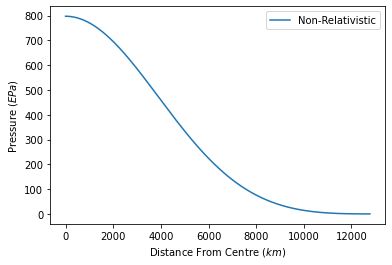

In [22]:
def integrate2(P, m):
    end = False
    r = 1
    step = 1000
    Masses = []
    Pressures = []
    Radii = []
    while end == False:
        slope_m = dM_dr(P, m, r)
        m = m + slope_m * step
        slope_P = dP_dr(P, m, r)
        P = P + slope_P * step
        if P < 0:
            break
        Masses = Masses + [m/(1.989*10**30)]
        Pressures = Pressures + [P/(10**18)]
        Radii = Radii + [r/1000]
        r = r + step
    return Masses, Pressures, Radii
print(P_med)
print(P_med2)
K = K_nrel
M, P, r = integrate2(P_med, 0)
K = K_rel
M2, P2, r2 = integrate2(P_med2, 0)

plt.plot(r, P, label = 'Non-Relativistic')
plt.xlabel("Distance From Centre ($km$)")
plt.ylabel("Pressure ($EPa$)")
plt.legend(loc = 'upper right')
plt.savefig('N-Rel Pressure.png')

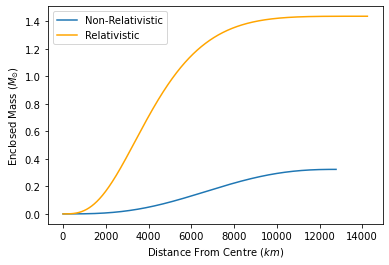

In [24]:
plt.plot(r, M, label = 'Non-Relativistic')
plt.plot(r2, M2, color = 'orange', label = 'Relativistic')
plt.xlabel("Distance From Centre ($km$)")
plt.ylabel("Enclosed Mass ($M_{\odot}$)")
plt.legend(loc = 'upper left')
plt.savefig('Mass.png')

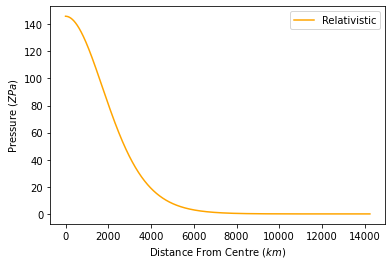

In [25]:
plt.plot(r2,(np.array(P2)/(10**3)), color = 'orange', label = 'Relativistic')
plt.xlabel("Distance From Centre ($km$)")
plt.ylabel("Pressure ($ZPa$)")
plt.legend(loc = 'upper right')
plt.savefig('Rel Pressure.png')

9.87603720620214e-13


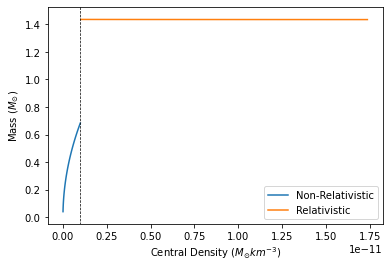

In [75]:
# Mass vs density
Break_density_val = (Densities[len(Densities)-1])*10**9/(1.989*10**30)
Break_density = []
for i in range (0, len(Densities)):
    Break_density = Break_density + [Break_density_val]
print (Break_density_val)
plt.plot(np.array(Densities)*10**9/(1.989*10**30), x, label = 'Non-Relativistic')
plt.plot(np.array(Densities2)*10**9/(1.989*10**30), x2, label = 'Relativistic')
plt.plot(Break_density, np.linspace(-0.3, 1.6, 40), color = 'black', linewidth = 0.7, linestyle = '--')
plt.ylim([-0.05, 1.53])
plt.xlabel("Central Density ($M_{\odot}{km^{-3}}$)")
plt.ylabel("Mass ($M_{\odot}$)")
plt.legend(loc = 'lower right')
plt.savefig('Mass v Density.png')

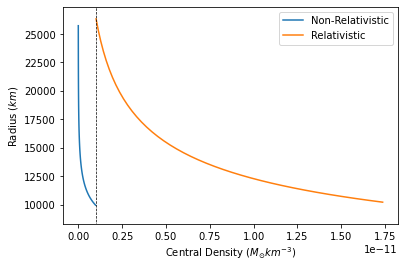

In [76]:
# Radius vs density
plt.plot(np.array(Densities)*10**9/(1.989*10**30), y, label = 'Non-Relativistic')
plt.plot(np.array(Densities2)*10**9/(1.989*10**30), y2, label  = 'Relativistic')
plt.plot(Break_density, np.linspace(7500, 30000, 40), color = 'black', linewidth = 0.7, linestyle = '--')
plt.ylim([8300, 27400])
plt.xlabel("Central Density ($M_{\odot}{km^{-3}}$)")
plt.ylabel("Radius ($km$)")
plt.legend(loc = 'upper right')
plt.savefig('Radius v Density.png')

In [2]:
print(K_rel)
print(K_nrel)

1.2122284248329698e-13
1.7279099824982553e-22
